## Chapter 1.9a: Fault relations
***
A first example to show, which relation between faults and series can be represenented by GemPy. A set of thre horizontally deposited units is offset by a single fault. Two younger units deposited on top of these units, filling the space created by the offset (e.g. faulting occured synsedimentary).

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

We import a model from an existing folder.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-9a_Fault_relations')

Compiling theano function...
Compilation Done!


In [3]:
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [7. 7. 7. ... 2. 2. 2.] 
Lithology scalar field 
  [10.2209053  10.24573994 10.27057934 ... 31.25595856 31.27820396
 31.30068016] 
Fault block 
  [[2. 2. 2. ... 1. 1. 1.]]

In [4]:
gp.activate_interactive_df(geo_model)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

If necessary, functions to display input data:

In [5]:
#geo_model.qi.get('orientations')

In [6]:
#geo_model.qi.get('surface_points')

Displaying the order of the different surfaces and series:

In [7]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [9]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Displaying the input data:

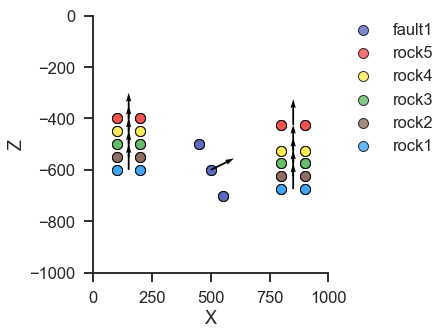

In [12]:
gp.plot.plot_data(geo_model, direction='y')

KeyError: 2

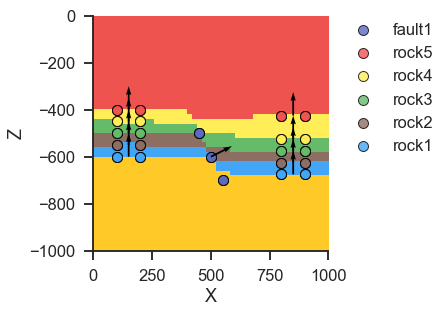

In [13]:
gp.plot.plot_section(geo_model, 25, plot_data=True)

Save model if changes were made:

In [14]:
#gp.compute_model(geo_model, compute_mesh=False)

In [15]:
geo_model.save_model('Tutorial_ch1-9a_Fault_relations')

Directory already exists, files will be overwritten


True